In [ ]:
import pandas as pd

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('NabadiyoNolol.csv')
training_data = pd.read_csv('allTrainingData.csv',encoding="ISO-8859-1")

In [ ]:
df.head(1)

,tweetId,tweetUrl,username,userId,isRetweet,isPinned,time,text,replies,retweets,likes,entries,query_keywords
0,1301621083402047488,/SpadeSultan_99/status/1301621083402047488,SpadeSultan_99,709563811620130817,False,False,2020-09-03 20:40:23,In the coming hours we will probably hear that...,1,2,9,"{'hashtags': ['#NabadIyoNolol', '#Jubaland', '...",#NabadiyoNolol


In [ ]:
training_data.head()

,Unnamed: 0,tweet_id,tweet_key,sentiment,text
0,0,264183816548130816,15140428,positive,Gas by my house hit $3.39!!!! I'm going to Cha...
1,1,264249301910310912,18516728,negative,Iranian general says Israel's Iron Dome can't ...
2,2,264105751826538497,147088367,positive,with J Davlar 11th. Main rivals are team Polan...
3,3,264094586689953794,332474633,negative,"Talking about ACT's &amp;&amp; SAT's, deciding..."
4,4,254941790757601280,557103111,negative,"They may have a SuperBowl in Dallas, but Dalla..."


In [ ]:
# 1600000-5000

In [ ]:
t_data = pd.DataFrame()
t_data['label'] = training_data['sentiment']
t_data['text'] = training_data['text']

In [ ]:
t_data.shape

(8002, 2)

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv
import _pickle as cPickle
from scipy.io import loadmat
from sklearn.svm import SVC
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv
import _pickle as cPickle
from scipy.io import loadmat
from sklearn.svm import SVC
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger')

from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

#lmtzr.lemmatize('octopi')

def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
t_data['lemma_text']=[lemmatize_with_postag(tweet) for tweet in t_data["text"]]

In [ ]:
df['lemma_text']=[lemmatize_with_postag(tweet) for tweet in df["text"]]

In [ ]:
df['lemma_text'].replace('', np.nan, inplace=True)
df.dropna(subset=['lemma_text'], inplace=True) 

t_data['lemma_text'].replace('', np.nan, inplace=True)
t_data.dropna(subset=['lemma_text'], inplace=True) 

In [ ]:
bow_transformer = CountVectorizer().fit(df['lemma_text'])
review_bow = bow_transformer.transform(df['lemma_text'])

tfidf_transformer =TfidfTransformer().fit(review_bow)
review_tfidf = tfidf_transformer.transform(review_bow)
review_tfidf.shape

(1560, 312)

In [ ]:
pipeline_svm = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', SVC()),
])

# pipeline parameters to automatically explore and tune
param_svm = [
  {'classifier__C': [1, 10, 100, 1000], 'classifier__kernel': ['linear']},
  {'classifier__C': [1, 10, 100, 1000], 'classifier__gamma': [0.001, 0.0001], 'classifier__kernel': ['rbf']},
]



grid_svm = GridSearchCV(
    pipeline_svm, #object used to fit the data
    param_grid=param_svm, 
    refit=True,  # fit using all data, on the best detected classifier
    n_jobs=-1,  # number of cores to use for parallelization; -1 for "all cores" i.e. to run on all CPUs
    scoring='accuracy',#optimizing parameter
    cv=StratifiedKFold(n_splits=5),
)


parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)],
             'tfidf__use_idf': (True, False),
             'clf-svm__alpha': (1e-2, 1e-3),
}
grid_svm = GridSearchCV(
    pipeline_svm, #object used to fit the data
    param_grid=param_svm, 
    refit=True,  # fit using all data, on the best detected classifier
    n_jobs=-1,  # number of cores to use for parallelization; -1 for "all cores" i.e. to run on all CPUs
    scoring='accuracy',#optimizing parameter
    cv=StratifiedKFold(n_splits=5),
)



In [ ]:
 %time classifier = grid_svm.fit(t_data['lemma_text'], t_data['label']) 

CPU times: user 16.7 s, sys: 280 ms, total: 17 s
Wall time: 9min 57s


In [ ]:
df['predicted'] = classifier.predict(df['text'])

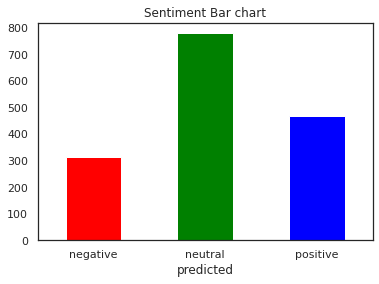

In [ ]:
# df['predicted'].plot.bar()
# my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
df.groupby(['predicted'])['predicted'].count().plot.bar(rot=0,color=['r','g','b'],title="Sentiment Bar chart")

In [ ]:
df.groupby(['predicted'])['predicted'].count()
#title='Video streaming dropout by category'

predicted
negative    312
neutral     780
positive    468
Name: predicted, dtype: int64

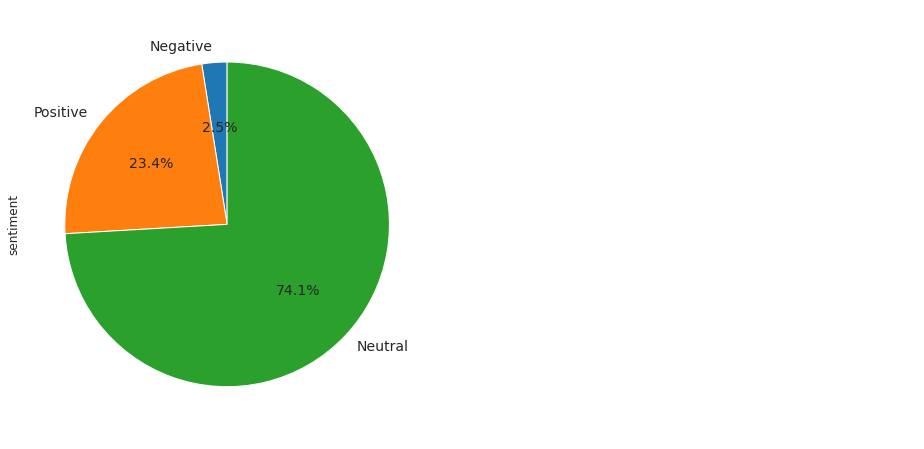

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# from pandas.tools.plotting import table

# sample data
raw_data = {'Sentiment_label': ['Negative', 'Positive', 'Neutral'],
        'sentiment': [19, 178,563]}
pie_df = pd.DataFrame(raw_data, columns = ['Sentiment_label', 'sentiment'])
#df['sentiment'] = df['jan_arrests'] + df['feb_arrests'] + df['march_arrests']

plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
pie_df.plot(kind='pie', y = 'sentiment', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=pie_df['Sentiment_label'], legend = False, fontsize=14)

# plot table
ax2 = plt.subplot(122)
plt.axis('off')
#tbl = table(ax2, df, loc='center')
#tbl.auto_set_font_size(False)
#tbl.set_fontsize(14)
plt.show()

In [ ]:
df['rm_stp'][0]

'coming hours probably hear Madoobe has been placed under arrest. It’s shame had end way Adeer. build inclusive prosperous Jubbaland inshallah. #NabadIyoNolol https://twitter.com/doonnaisbadal/status/1301582779310891008'

In [ ]:
import re
text = re.sub(r'^https?:\/\/.*[\r\n]*', '', df['rm_stp'][0], flags=re.MULTILINE)

In [ ]:
df['cleanLinks'] = df['rm_stp'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [ ]:
pd.set_option('display.max_colwidth', -1)
df['cleanLinks']

In [ ]:
import re
def cleaning_PicURL (text):
    text = re.sub(r'pic.twitter.com/[\w]*',"", text)
    return text

df['clean_pic'] = [cleaning_PicURL(text) for text in df['cleanLinks'].to_list()]

In [ ]:
df['clean_pic']

0       coming hours probably hear Madoobe has been placed under arrest. It’s shame had end way Adeer. build inclusive prosperous Jubbaland inshallah. #NabadIyoNolol                                                                                         
1       he didn’t rescue them earlier then being there fate know. Mashaallah #NabadIyoNolol                                                                                                                                                                   
2       abuse imprisonement Ethiopian citizens Lebanon Saudi makes me even more proud #NabadIyoNolol policy systematic repatriation Somali nationals those countries.                                                                                         
3       Talks between President FGS H.E @M_Farmaajo @SaidAbdullahiDe collapsed after Puntland leader demanded other FMS present. Badda cab baa lagu yidhi. #Samareeb3 agreement not renegotiated! #NabadIyoNolol                           

In [ ]:
# df['Text'] = df['text'].astype('str') 
df = df.dropna()
#query = 'What is hello xd bat_user shame on you uae xf xf xa xf xf xa xd..'
def rem_stpw(sent):
    stopwords = ['http','@','at','we','our','or','for','the','is','to','of','in','for','and','on','&','s',
                 'a','this','I','just','it','are','but','you','your','if','any','with','us','have','…','be',
                 'de','la','from','le','about','en','can','here','!','by','à','-','how','How','les','an','ee',
                 'that',':','will','uu','new','their','as','https', 'pic.twitter.com']
    querywords = sent.split()
    resultwords  = [word for word in querywords if word.lower() not in stopwords]
    result = ' '.join(resultwords)
    return result
#df['Review_nostpw']=[rem_stpw(sent) for sent in df['Review']]



In [ ]:
df['rm_stp'] = [rem_stpw(tweet) for tweet in df["clean_pic"]] 

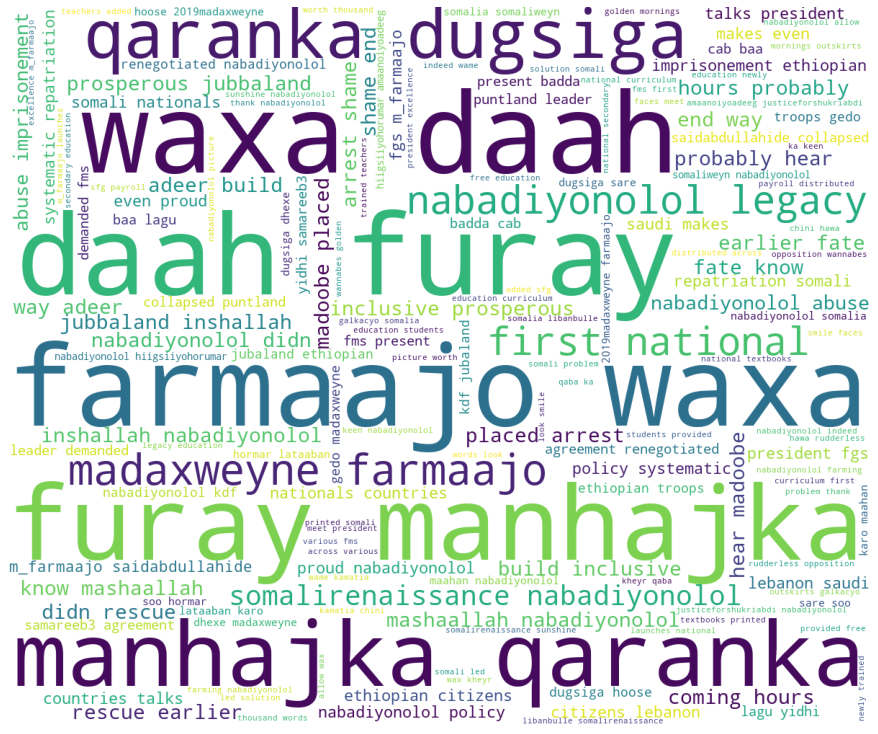

In [ ]:
# Python program to generate WordCloud 

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

# Reads 'Youtube04-Eminem.csv' file 
#df = pd.read_csv(r"Youtube04-Eminem.csv", encoding ="latin-1") 

comment_words = ' '
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in df.rm_stp:
  # typecaste each val to string
  val = str(val)
  # split the value
  tokens = val.split()
  # Converts each token into lowercase 
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower() 
  
  for words in tokens:
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 1200, height = 1000, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words) 

# plot the WordCloud image					 
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [ ]:
df_to_bar =df.rm_stp.str.split(expand=True).stack().value_counts()

In [ ]:
pd.set_option('display.max_colwidth', -1)
df_to_bar

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


#NabadIyoNolol        1092
Somali                390 
#NabadiyoNolol        390 
national              234 
#SomaliRenaissance    234 
                     ...  
inscribed             78  
under                 78  
secondary             78  
H.E                   78  
magacaabay.           78  
Length: 281, dtype: int64

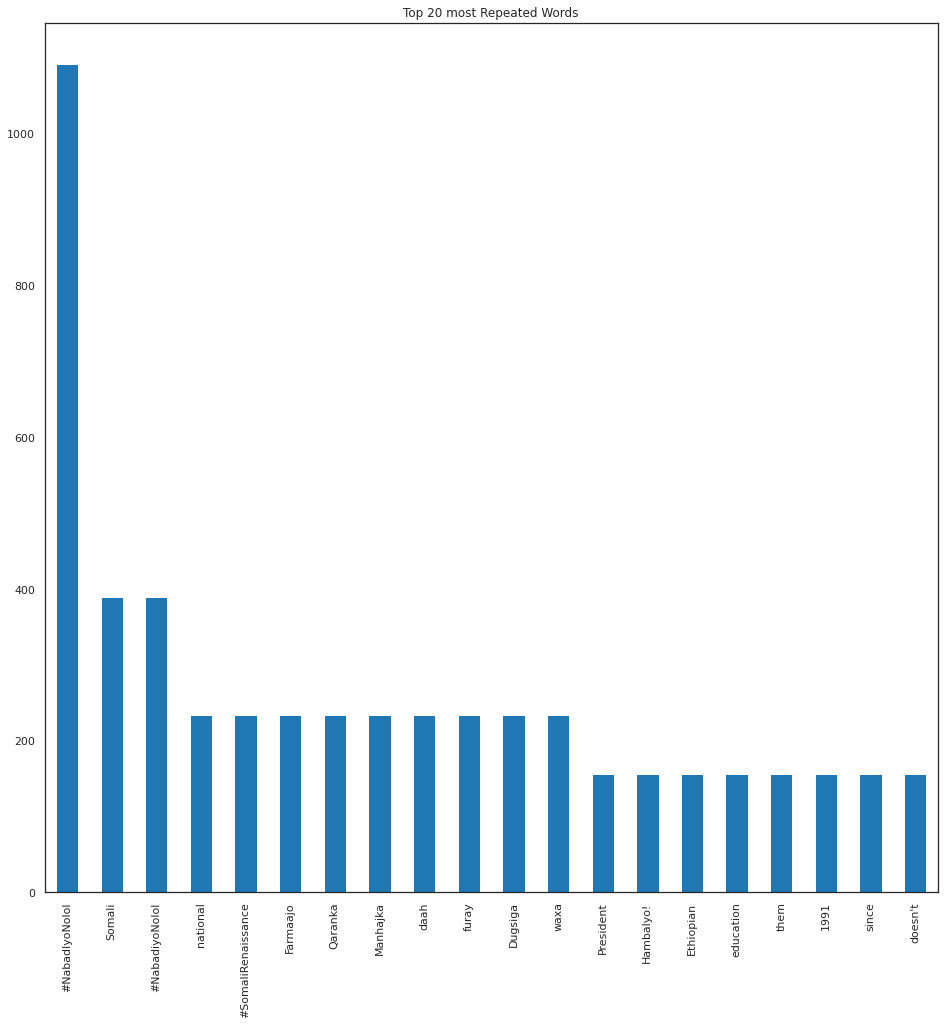

In [ ]:
df_to_bar[:20].plot.bar(figsize = (16, 16),title='Top 20 most Repeated Words')

In [ ]:
pos_result = df.loc[df['predicted'].isin(['positive'])]
neg_result = df.loc[df['predicted'].isin(['negative'])]
neutral_result = df.loc[df['predicted'].isin(['neutral'])]

In [ ]:
# pos_result.shape
pos_to_bar =pos_result.rm_stp.str.split(expand=True).stack().value_counts()
neg_to_bar =neg_result.rm_stp.str.split(expand=True).stack().value_counts()
neu_to_bar =neutral_result.rm_stp.str.split(expand=True).stack().value_counts()

In [ ]:
print('top positive words\n')
print(pos_to_bar[:10])
print('top negative words\n')
print(neg_to_bar[:10])
print('top neutral words\n')
print(neu_to_bar[:10])

top positive words

#NabadIyoNolol    312
Qaranka           234
Farmaajo          234
Somali            234
furay             234
daah              234
Manhajka          234
waxa              234
Dugsiga           234
Madaxweyne        156
dtype: int64
top negative words

#NabadIyoNolol    234
Hambalyo!         156
method            78 
paprika           78 
saaxiib           78 
leader            78 
Badda             78 
Soomaaliya        78 
H.E               78 
tijaabiyey        78 
dtype: int64
top neutral words

#NabadIyoNolol        546
#NabadiyoNolol        234
since                 156
#SomaliRenaissance    156
them                  156
first                 156
Somali                156
national              156
doesn't               156
1991                  156
dtype: int64


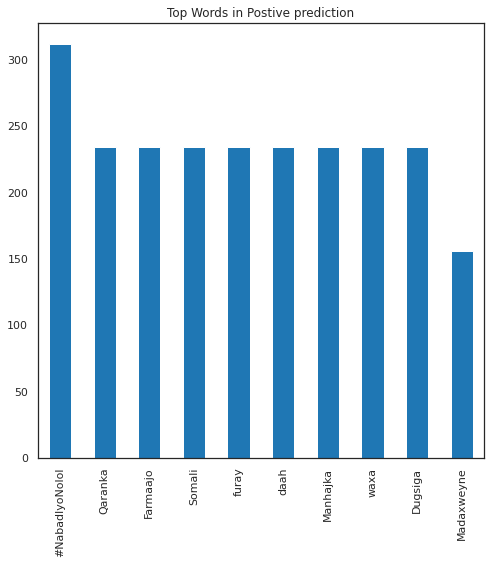

In [ ]:
pos_to_bar[:10].plot.bar(figsize = (8, 8),title='Top Words in Postive prediction')

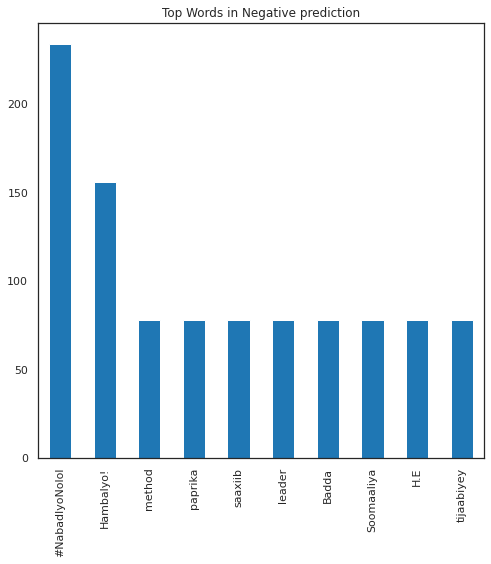

In [ ]:
neg_to_bar[:10].plot.bar(figsize = (8, 8),title='Top Words in Negative prediction')

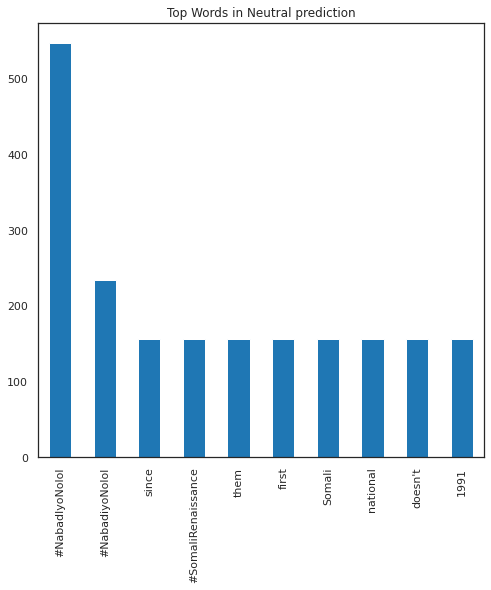

In [ ]:
neu_to_bar[:10].plot.bar(figsize = (8, 8),title='Top Words in Neutral prediction')

In [ ]:
pos_to_bar.to_csv('positive_row_words_count.csv')
neg_to_bar.to_csv('negative_row_words_count.csv')
neu_to_bar.to_csv('neutral_row_words_count.csv')

In [ ]:
df.to_csv('result.csv',index=False)

In [ ]:
#wrong result dataset 
#labels in graphs 
#count 
#bar chart
#line charts with dates 
#groups with times 


In [ ]:
# import matplotlib.pyplot as plt

In [ ]:
df.head(1)

,tweetId,tweetUrl,username,userId,isRetweet,isPinned,time,text,replies,retweets,likes,entries,query_keywords,lemma_text,predicted,rm_stp,cleanLinks,clean_pic
0,1301621083402047488,/SpadeSultan_99/status/1301621083402047488,SpadeSultan_99,709563811620130817,False,False,2020-09-03 20:40:23,In the coming hours we will probably hear that Madoobe has been placed under arrest. It’s a shame it had to end this way Adeer. We will build an inclusive and prosperous Jubbaland inshallah.\n#NabadIyoNolol https://twitter.com/doonnaisbadal/status/1301582779310891008 …,1,2,9,"{'hashtags': ['#NabadIyoNolol', '#Jubaland', '#Garbaharey', '#Gedo'], 'urls': ['https://twitter.com/doonnaisbadal/status/1301582779310891008'], 'photos': [], 'videos': []}",#NabadiyoNolol,In the coming hour we will probably hear that Madoobe have be place under arrest It ’ s a shame it have to end this way Adeer We will build an inclusive and prosperous Jubbaland inshallah NabadIyoNolol http //twitter.com/doonnaisbadal/status/1301582779310891008 …,positive,coming hours probably hear Madoobe has been placed under arrest. It’s shame had end way Adeer. build inclusive prosperous Jubbaland inshallah. #NabadIyoNolol,coming hours probably hear Madoobe has been placed under arrest. It’s shame had end way Adeer. build inclusive prosperous Jubbaland inshallah. #NabadIyoNolol,coming hours probably hear Madoobe has been placed under arrest. It’s shame had end way Adeer. build inclusive prosperous Jubbaland inshallah. #NabadIyoNolol


In [ ]:
r_df = pd.read_csv('result.csv')

by_day_sentiment = df.groupby([pd.Grouper(key='time'), 'predicted']) \
    .size().unstack('predicted')

In [ ]:
r_df.head(1)

,tweetId,tweetUrl,username,userId,isRetweet,isPinned,time,text,replies,retweets,likes,entries,query_keywords,lemma_text,predicted,rm_stp,cleanLinks,clean_pic
0,1301621083402047488,/SpadeSultan_99/status/1301621083402047488,SpadeSultan_99,709563811620130817,False,False,2020-09-03 20:40:23,In the coming hours we will probably hear that Madoobe has been placed under arrest. It’s a shame it had to end this way Adeer. We will build an inclusive and prosperous Jubbaland inshallah.\n#NabadIyoNolol https://twitter.com/doonnaisbadal/status/1301582779310891008 …,1,2,9,"{'hashtags': ['#NabadIyoNolol', '#Jubaland', '#Garbaharey', '#Gedo'], 'urls': ['https://twitter.com/doonnaisbadal/status/1301582779310891008'], 'photos': [], 'videos': []}",#NabadiyoNolol,In the coming hour we will probably hear that Madoobe have be place under arrest It ’ s a shame it have to end this way Adeer We will build an inclusive and prosperous Jubbaland inshallah NabadIyoNolol http //twitter.com/doonnaisbadal/status/1301582779310891008 …,positive,coming hours probably hear Madoobe has been placed under arrest. It’s shame had end way Adeer. build inclusive prosperous Jubbaland inshallah. #NabadIyoNolol,coming hours probably hear Madoobe has been placed under arrest. It’s shame had end way Adeer. build inclusive prosperous Jubbaland inshallah. #NabadIyoNolol,coming hours probably hear Madoobe has been placed under arrest. It’s shame had end way Adeer. build inclusive prosperous Jubbaland inshallah. #NabadIyoNolol


In [ ]:
#by_day_sentiment

In [ ]:
# by_day_sentiment
r_df['sentiment_date'] = [date_text[0:-9] for date_text in r_df['time']]

In [ ]:
r_df['sentiment_date'].head(1)

0    2020-09-03
Name: sentiment_date, dtype: object

In [ ]:
date_sentiment = r_df.groupby(['sentiment_date'])['predicted'].count()

In [ ]:
by_date_sentiment = r_df.groupby([pd.Grouper(key='sentiment_date'), 'predicted']) \
    .size().unstack('predicted')

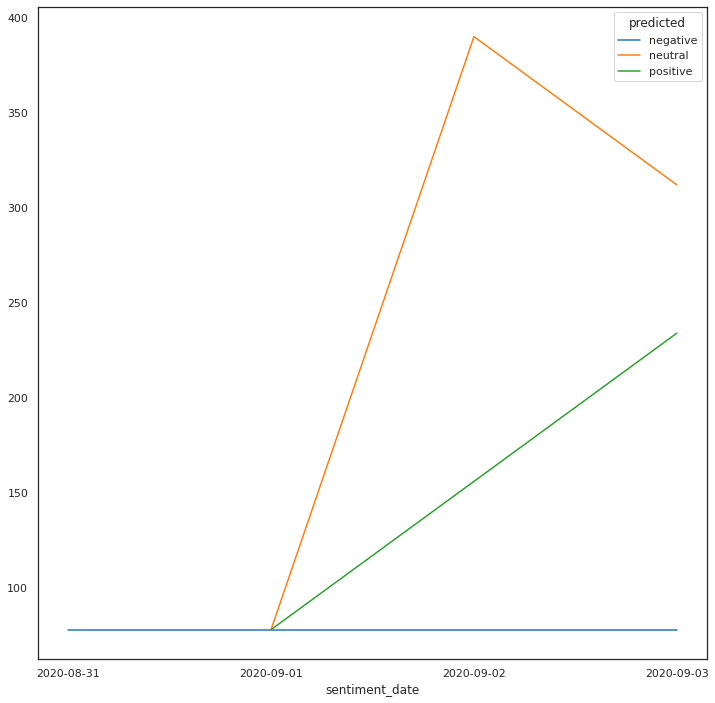

In [ ]:
by_date_sentiment.plot(figsize = (12, 12))

In [ ]:
by_date_sentiment.head(10)

predicted,negative,neutral,positive
sentiment_date,,,
2020-08-31,78.0,NaN,NaN
2020-09-01,78.0,78.0,78.0
2020-09-02,78.0,390.0,156.0
2020-09-03,78.0,312.0,234.0


In [ ]:
by_year_sentiment = r_df.groupby([pd.Grouper(key='sentiment_date'), 'predicted']) \
    .size().unstack('predicted')

In [ ]:
pd.set_option('display.max_colwidth', -1)
r_df["entries"].head(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


0    {'hashtags': ['#NabadIyoNolol', '#Jubaland', '#Garbaharey', '#Gedo'], 'urls': ['https://twitter.com/doonnaisbadal/status/1301582779310891008'], 'photos': [], 'videos': []}
Name: entries, dtype: object

In [ ]:
r_df['sentiment_date'] = [date_text[0:-9] for date_text in r_df['time']]
by_year_sentiment = r_df.groupby([pd.Grouper(key='likes'), 'sentiment_date']) \
    .size().unstack('sentiment_date')

In [ ]:
by_year_sentiment

sentiment_date,2020-08-31,2020-09-01,2020-09-02,2020-09-03
likes,,,,
0,NaN,78.0,78.0,78.0
1,NaN,NaN,NaN,78.0
2,78.0,NaN,NaN,78.0
3,NaN,78.0,NaN,234.0
9,NaN,NaN,NaN,78.0
11,NaN,NaN,78.0,NaN
13,NaN,NaN,78.0,NaN
22,NaN,NaN,78.0,NaN
26,NaN,NaN,78.0,NaN


In [ ]:
import json
def returnRowHashtags(row):
  print(str(row))
  data = json.loads(str(row))
  print(data)
  
  #print(row)
  

In [ ]:
df_entires = pd.read_csv('NabadiyoNolol.csv')

In [ ]:
df_entires.head(1)

In [ ]:
str(df_entires["entries"].iloc[0])

In [ ]:
data_dict = df_entires["entries"].to_dict()

In [ ]:
#pd.DataFrame(data_dict)

In [ ]:
#data_dict